In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

![](img/571_lab_banner.png)

# Lab 4: Naive Bayes and Logistic Regression

## Imports

In [1]:
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert-warning">
    
## Instructions  
rubric={mechanics}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Read the **[Use of Generative AI Policy](https://ubc-mds.github.io/policies/)**.
  
- Review the **[General Lab Instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/)**.
    
- Check the **[MDS Rubrics](https://github.com/UBC-MDS/public/tree/master/rubric)** for grading criteria.

### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.
    
- **Include a clickable link to your GitHub repository** below this cell.

- Make at least 3 commits to your GitHub repository and ensure it's up to date. If Gradescope becomes inaccessible, we'll grade the most recent GitHub version submitted before the deadline.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  



### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Points:_ 2

YOUR REPO LINK GOES HERE

<!-- END QUESTION -->

<br><br>

## Exercise 1: Naive Bayes by hand
<hr>

Naive Bayes is commonly used for text classification. In the lecture, we explored its use for spam detection. Now we'll apply it to another text classification task called [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). 

Consider the toy data provided, which contains 10 training examples. Each example has 4 binary features indicating the presence or absence of a word, as well as the sentiment associated with each example.

In [2]:
sentiment_toy_data = {
    "predictable": [1, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    "fun": [0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
    "pathetic": [0, 0, 1, 0, 0, 1, 0, 1, 1, 1],
    "satire": [0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
    "target": [
        "negative",
        "positive",
        "negative",
        "positive",
        "positive",
        "negative",
        "positive",
        "negative",
        "negative",
        "negative",
    ],
}

toy_df = pd.DataFrame(sentiment_toy_data)
toy_df

,predictable,fun,pathetic,satire,target
0,1,0,0,0,negative
1,1,1,0,0,positive
2,1,0,1,0,negative
3,0,1,0,0,positive
4,0,1,0,1,positive
5,1,0,1,1,negative
6,1,0,0,0,positive
7,0,0,1,1,negative
8,0,0,1,0,negative
9,1,1,1,1,negative


Given this information, you want to predict the target (positive or negative sentiment) for the following unseen test example: 
    
$$x_{new} = \begin{bmatrix}1 & 1 & 0 & 1\end{bmatrix}$$

In the following sub-exercises, we'll do this step by step. 

<br><br>

<div class="alert alert-info">
    
### 1.1 Class prior probabilities
rubric={autograde}

**Your tasks:**

Compute the estimates of the class prior probabilities by hand.
1. Calculate $p(\text{positive})$ and store the result in a variable named `pos_prior`.
1. Calculate $p(\text{negative})$ and store the result in a variable named `neg_prior`.

Simply compute the raw frequencies/proportions and assign them to the appropriate variables as fractions, such as 1/2. There's no need to show your calculation steps or provide explanations.

</div>

<div class="alert alert-warning">
    
Solution_1.1
    
</div>

_Points:_ 2

In [3]:
pos_prior = None  # type: float
neg_prior = None  # type: float

# BEGIN SOLUTION

pos_prior = 4 / 10
neg_prior = 6 / 10

# END SOLUTION

In [ ]:
grader.check("q1.1")

<br><br>

<div class="alert alert-info">
    
### 1.2 Conditional probabilities
rubric={autograde}

**Your tasks:**

1. Manually calculate the conditional probabilities needed by naive Bayes for the test example $x_{new}$. 
    $$x_{new} = \begin{bmatrix}1 & 1 & 0 & 1\end{bmatrix}$$
2. Store the conditional probability values in the following variables. Each variable corresponds to the likelihood of a word's presence or absence given its class. For example, `fun1_pos` stands for $p(\text{fun} = 1  \mid \text{positive})$ and `pathetic0_pos` represents $p(\text{pathetic} = 0  \mid \text{positive})$. 

You do not need to show any work. Also, do not consider Laplace smoothing here, just compute the raw frequencies/proportions by hand and store them into the appropriate variables as fractions (e.g., 1/2).

</div>

<div class="alert alert-warning">
    
Solution_1.2
    
</div>

_Points:_ 4

In [6]:
predictable1_pos = None  # p(predictable = 1 | positive), type: float
predictable1_neg = None  # p(predictable = 1 | negative), type: float
fun1_pos = None  # p(fun = 1 | positive), type: float
fun1_neg = None  # p(fun = 1 | negative), type: float
pathetic0_pos = None  # p(pathetic = 0 | positive), type: float
pathetic0_neg = None  # p(pathetic = 0 | negative), type: float
satire1_pos = None  # p(satire = 1 | positive), type: float
satire1_neg = None  # p(satire = 1 | negative), type: float

# BEGIN SOLUTION

predictable1_pos = 2 / 4
predictable1_neg = 4 / 6
fun1_pos = 3 / 4
fun1_neg = 1 / 6
pathetic0_pos = 4 / 4
pathetic0_neg = 1 / 6
satire1_pos = 1 / 4
satire1_neg = 3 / 6

# END SOLUTION

1. $p(\text{predictable} = 1 \mid \text{positive}) = 2/4 $
2. $p(\text{predictable} = 1 \mid \text{negative}) = 4/6$
3. $p(\text{fun} = 1  \mid \text{positive}) = 3/4$
4. $p(\text{fun} = 1  \mid \text{negative}) = 1/6$
5. $p(\text{pathetic} = 0  \mid \text{positive}) = 4/4$.
6. $p(\text{pathetic} = 0  \mid \text{negative}) = 1/6$.
7. $p(\text{satire} = 1  \mid \text{positive}) = 1/4$.
8. $p(\text{satire} = 1  \mid \text{negative}) = 3/6$.

In [ ]:
grader.check("q1.2")

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 1.3 Prediction
rubric={reasoning}


**Your tasks:**

1. Based on the naive Bayes model and the probabilities you've estimated, what is the most probable label for the test example, $x_{new}$, given below: "positive" or "negative"? Please show your calculations. 

$$x_{new} = \begin{bmatrix}1 & 1 & 0 & 1\end{bmatrix}$$

> We are not expecting any code here. Compute the probabilities by hand and show your steps. You may typeset in LaTeX (preferred) or upload a clear photo/scan of handwritten work.

</div>

<div class="alert alert-warning">
    
Solution_1.3
    
</div>

_Points:_ 5

_Type your answer here, replacing this text._

$$p(\text{positive} \mid \text{predictable} = 1, \text{fun} = 1, \text{pathetic} = 0, \text{satire} = 1) \propto p(\text{predictable} = 1, \text{fun} = 1, \text{pathetic} = 0, \text{satire} = 1 \mid \text{positive})p(\text{positive}) $$

$$ = p(\text{predictable} = 1 \mid \text{positive})p(\text{fun} = 1 \mid \text{positive})p(\text{pathetic} = 0 \mid \text{positive}) p(\text{satire} = 1 \mid \text{positive}) p(\text{positive})$$

$$ = (2/4)(3/4)(4/4)(1/4)(4/10)$$

$$\approx  0.0375 $$

And

$$p(\text{negative} \mid \text{predictable} = 1, \text{fun} = 1, \text{pathetic} = 0, \text{satire} = 1) \propto p(\text{predictable} = 1, \text{fun} = 1, \text{pathetic} = 0, \text{satire} = 1 \mid \text{negative})p(\text{negative}) $$

$$ = p(\text{predictable} = 1 \mid \text{negative})p(\text{fun} = 1 \mid \text{negative})p(\text{pathetic} = 0 \mid \text{negative}) p(\text{satire} = 1 \mid \text{negative}) p(\text{negative})$$

$$ = (4/6)(1/6)(1/6)(3/6)(6/10)$$

$$\approx 0.006$$

Since $p(\text{positive} \mid \text{predictable} = 1, \text{fun} = 1, \text{pathetic} = 0, \text{satire} = 1)$ is proportional to a bigger number, and the proportionality constants are the same $(p(\text{predictable}=1,\text{fun}=1,\text{pathetic}=0, \text{satire} = 1))$, we would predict "positive".

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 1.4 Smoothing
rubric={reasoning}

**Your tasks:**

1. Suppose you are asked to predict sentiment of another test example $\hat{x}_{new}$. What issues might arise when calculating $p(positive \mid \hat{x}_{new})$? How would you address these challenges? 

$$\hat{x}_{new} = \begin{bmatrix}0 & 1 & 1 & 1\end{bmatrix}$$

> You don't have to write any code here. Just explanation in a few sentences is enough.

</div>

<div class="alert alert-warning">
    
Solution_1.4
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

$P(positive \mid \hat{x}_{new})$ will be 0 because the word `pathetic` does not occur with positive class in the training data $P(\text{pathetic} = 1 \mid positive) =  0$. So this term would obliterate the evidence provided by other terms in the review. One way to deal with this problem is by using Laplace smoothing, where we use the hyperparameter $\alpha = 1$ which accounts for features not present in the given data when calculating conditional probabilities. 

**Extra information (not expected in student answer):**

Let's calculate probability estimates with Laplace smoothing. Note that when you calculate conditional probabilities with Laplace smoothing for Bernoulli naive Bayes, the formula is slightly different: 

$$ P(w \mid c) = \frac{Count(w, c) + \alpha }{Count(c) + 2 \times \alpha}$$ 


In [15]:
# BEGIN SOLUTION
pos_prob_est = (4 / 10) * (3 / 6) * (4 / 6) * (1 / 6) * (2 / 6)
neg_prob_est = (6 / 10) * (3 / 8) * (2 / 8) * (6 / 8) * (4 / 8)

pos_prob_est, neg_prob_est
# END SOLUTION

(0.007407407407407406, 0.021093749999999998)

In [16]:
# BEGIN SOLUTION
norm = pos_prob_est + neg_prob_est
pos_prob = pos_prob_est / norm
neg_prob = neg_prob_est / norm

neg_prob, pos_prob
# END SOLUTION

(0.7401015228426395, 0.25989847715736036)

Let's get prediction probability scores using `BernoulliNB`. 

In [17]:
# BEGIN SOLUTION
X_train = toy_df.drop(columns=["target"])
y_train = toy_df["target"]
X_new_hat = [[0, 1, 1, 1]]

from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB(alpha=1)
model.fit(X_train.values, y_train)

model.predict(X_new_hat)
# END SOLUTION

array(['negative'], dtype='<U8')

In [18]:
# BEGIN SOLUTION
model.predict_proba(X_new_hat)
# END SOLUTION

array([[0.74010152, 0.25989848]])

BAM! They match with the scores we got above! 

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br>

<div class="alert alert-info">
    
## Exercise 2: Implementing `DummyClassifier`
<hr>
rubric={autograde}

In this course, you will generally **not** be asked to implement machine learning algorithms (like logistic regression) from scratch (You will be doing it in DSCI 572). However, this exercise is an exception: you will implement the simplest possible classifier, `DummyClassifier`.

As a reminder, `DummyClassifier` is meant as a baseline and is generally the worst possible "model" you could "fit" to a dataset. All it does is predict the most popular class in the training set. So if there are more 0s than 1s it predicts 0 every time, and if there are more 1s than 0s it predicts 1 every time. For `predict_proba` it looks at the frequencies in the training set, so if you have 30% 0's 70% 1's it predicts `[0.3 0.7]` every time. Thus, `fit` only looks at `y` (not `X`).

Below you will find starter code for a class called `MyDummyClassifier`, which has methods `fit()`, `predict()`, `predict_proba()` and `score()`. Your task is to fill in those four functions. To get you started, I have given you a `return` statement in each case that returns the correct data type: `fit` returns nothing, `predict` returns an array whose size is the number of examples, `predict_proba` returns an array whose size is the number of examples $\times$ 2, and `score` returns a number.

The next code block has some tests you can use to assess whether your code is working. 

I suggest starting with `fit` and `predict`, and making sure those are working before moving on to `predict_proba`. For `predict_proba`, you should return the proportion of each class in the training data. Your `score` function should call your `predict` function. Again, you can compare with `DummyClassifier` using the code below.

To simplify this question, you can assume **binary classification**, and furthermore that these classes are **encoded as 0 and 1**. In other words, you can assume that `y` contains only 0s and 1s. Scikit-learn's `DummyClassifier` works when you have more than two classes, and also works if the target values are encoded differently, for example as "cat", "dog", "elephant", etc.

> _Hint: In Python, if you define a variable within a class method using `self.variable_name`, it become an instance variable, allowing you to access it from other methods within the same class._

</div>


<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 8

In [19]:
class MyDummyClassifier:
    """
    A baseline classifier that predicts the most common class.
    The predicted probabilities come from the relative frequencies
    of the classes in the training data.

    This implementation only works when y only contains 0's and 1's.
    """

    def fit(self, X, y):
        """
        Fit the Dummy Classifier to the training data.

        Parameters:
        - X (array-like, shape (n_samples, n_features)): Training data.
        - y (array-like, shape (n_samples,)): Target labels (0's and 1's).

        Returns:
        - None
        """
        # Replace with your code
        # BEGIN SOLUTION
        self.prob_1 = np.mean(y == 1)
        # END SOLUTION
        return None  # Replace with your code

    def predict(self, X):
        """
        Predict the target labels for the input data.

        Parameters:
        - X (array-like, shape (n_samples, n_features)): Input data.

        Returns:
        - y_pred (array-like, shape (n_samples,)): Predicted target labels.
        """
        predictions = np.zeros(X.shape[0])  # initializing with all predictions set to 0
        # Replace with your code
        # BEGIN SOLUTION
        if self.prob_1 >= 0.5:
            predictions = np.ones(X.shape[0])
        else:
            predictions = np.zeros(X.shape[0])
        # END SOLUTION
        return predictions

    def predict_proba(self, X):
        """
        Predict class probabilities for the input data.

        Parameters:
        - X (array-like, shape (n_samples, n_features)): Input data.

        Returns:
        - probs (array-like, shape (n_samples, 2)): Predicted class probabilities.
          Column 0 corresponds to class 0, and column 1 corresponds to class 1.
        """
        probs = np.zeros((X.shape[0], 2))  # initializing all probabilities set to 0.
        # Replace with your code
        # BEGIN SOLUTION
        probs[:, 0] = 1 - self.prob_1
        probs[:, 1] = self.prob_1
        # END SOLUTION
        return probs  # Replace with your code

    def score(self, X, y):
        """
        Calculate the accuracy of the model on the input data.

        Parameters:
        - X (array-like, shape (n_samples, n_features)): Input data.
        - y (array-like, shape (n_samples,)): True target labels.

        Returns:
        - accuracy (float): Accuracy of the model on the input data.
        """
        accuracy = None
        # Replace with your code
        # BEGIN SOLUTION
        accuracy = np.mean(self.predict(X) == y)
        # END SOLUTION
        return accuracy

Below are some tests for `predict` using randomly generated data. You may want to run the cell a few times to make sure you explore different cases (or automate this with a loop or random seeds).

In [20]:
# For testing, generate random data
n_train = 101
n_valid = 21
d = 5
X_train_dummy = np.random.randn(n_train, d)
X_valid_dummy = np.random.randn(n_valid, d)
y_train_dummy = np.random.randint(2, size=n_train)
y_valid_dummy = np.random.randint(2, size=n_valid)

my_dc = MyDummyClassifier()
sk_dc = DummyClassifier(strategy="prior")

my_dc.fit(X_train_dummy, y_train_dummy)
sk_dc.fit(X_train_dummy, y_train_dummy)

assert np.array_equal(my_dc.predict(X_train_dummy), sk_dc.predict(X_train_dummy))
assert np.array_equal(my_dc.predict(X_valid_dummy), sk_dc.predict(X_valid_dummy))

In [21]:
y_train_dummy

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

Below are some tests for `predict_proba`.

In [22]:
assert np.allclose(
    my_dc.predict_proba(X_train_dummy), sk_dc.predict_proba(X_train_dummy)
)
assert np.allclose(
    my_dc.predict_proba(X_valid_dummy), sk_dc.predict_proba(X_valid_dummy)
)

Below are some tests for `score`.

In [23]:
assert np.isclose(
    my_dc.score(X_train_dummy, y_train_dummy), sk_dc.score(X_train_dummy, y_train_dummy)
)
assert np.isclose(
    my_dc.score(X_valid_dummy, y_valid_dummy), sk_dc.score(X_valid_dummy, y_valid_dummy)
)

In [ ]:
grader.check("q2")

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

<div class="alert alert-info">
    
## Exercise 3: Classifying happy moments
<hr>

Let's end this course on a happy note! We will use [HappyDB](https://www.kaggle.com/ritresearch/happydb) corpus which contains about 100,000 happy moments classified into 7 categories: *affection, exercise, bonding, nature, leisure, achievement, enjoy_the_moment*. The data was crowd-sourced via [Amazon Mechanical Turk (MTurk)](https://www.mturk.com/). The ground truth label is not available for all examples, and in this lab, we'll only use the examples where ground truth is available (~15,000 examples). 

- Download the data from [here](https://www.kaggle.com/ritresearch/happydb).
- Unzip the file and copy it in a folder called `data` under the lab directory.

The code below reads the data CSV (assuming that it's present in the current directory as *`data/cleaned_hm.csv`*),  cleans it up a bit, and splits it into train and test splits. 

</div>

In [26]:
df = pd.read_csv("data/cleaned_hm.csv", index_col=0)
sample_df = df.dropna()
sample_df.head()

,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category
hmid,,,,,,,,
27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
27678,45,24h,I meditated last night.,I meditated last night.,True,1,leisure,leisure
27697,498,24h,My grandmother start to walk from the bed afte...,My grandmother start to walk from the bed afte...,True,1,affection,affection
27705,5732,24h,I picked my daughter up from the airport and w...,I picked my daughter up from the airport and w...,True,1,bonding,affection
27715,2272,24h,when i received flowers from my best friend,when i received flowers from my best friend,True,1,bonding,bonding


In [27]:
sample_df = sample_df.rename(
    columns={"cleaned_hm": "moment", "ground_truth_category": "target"}
)
sample_df

,wid,reflection_period,original_hm,moment,modified,num_sentence,target,predicted_category
hmid,,,,,,,,
27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding
27678,45,24h,I meditated last night.,I meditated last night.,True,1,leisure,leisure
27697,498,24h,My grandmother start to walk from the bed afte...,My grandmother start to walk from the bed afte...,True,1,affection,affection
27705,5732,24h,I picked my daughter up from the airport and w...,I picked my daughter up from the airport and w...,True,1,bonding,affection
27715,2272,24h,when i received flowers from my best friend,when i received flowers from my best friend,True,1,bonding,bonding
...,...,...,...,...,...,...,...,...
128726,566,24h,yesterday chat with my brother in video call i...,yesterday chat with my brother in video call i...,False,1,affection,affection
128736,1580,24h,learning how to better hunt for hits on amazon...,learning how to better hunt for hits on amazon...,True,1,achievement,achievement
128746,248,24h,I woke up in the middle of the night and reali...,I woke up in the middle of the night and reali...,True,1,enjoy_the_moment,enjoy_the_moment


In [28]:
train_df, test_df = train_test_split(sample_df, test_size=0.3, random_state=123)
X_train, y_train = train_df["moment"], train_df["target"]
X_test, y_test = test_df["moment"], test_df["target"]

It's helpful to understand the distribution of our target values, and identify potential label imbalances in our dataset. If substantial imbalance exists, the model tends to overfit to the majority class while learning very little from the minority class. In more extreme cases, it might even default to predicting only the majority class. 

By checking the frequency of each target label, we can also estimate the baseline performance—the accuracy of a simple model. `DummyClassifier` would achieve this by always predicting the most frequent class.

In [29]:
train_df["target"].value_counts(normalize=True)

target
affection           0.342571
achievement         0.300799
bonding             0.127238
enjoy_the_moment    0.105694
leisure             0.090927
nature              0.018307
exercise            0.014463
Name: proportion, dtype: float64

The results indicate a clear class imbalance. The "nature" and "exercise" categories are underrepresented, while "affection" appears most frequently, accounting for roughly 34% of the examples. Consequently, a `DummyClassifier` that always predicts "affection" would achieve a baseline accuracy of about 34%.

<br><br>

<div class="alert alert-info">
    
### 3.1 Different classifiers 
rubric={autograde}

**Your tasks:**
1. For each model in the `models` dictionary below, perform 5-fold cross-validation. Show the mean and standard deviation of the following metrics:
    - `fit_time`
    - `score_time`
    - `test_score` (cross-validation score)
    - `train_score` (training score)
2. Store results in a pandas dataframe named `results_df`, where
    - Each row corresponds to a model
    - Each column shows mean and standard deviation of the metrics listed above.
    - Column names should be: `fit_time`, `score_time`, `test_score`, and `train_score`.
      
Example table format: 

  | Model          | fit_time        | score_time      | test_score   | train_score  |
  |----------------|-----------------|-----------------|--------------|--------------|
  | dummy          |  0.085 ± 0.005  |  0.021 ± 0.003  |  0.343 ± 0.0 |  0.343 ± 0.0 | 
  | decision tree  |                 |                 |              |              |
  | kNN            |                 |                 |              |              |
  | RBF SVM        |                 |                 |              |              |

> Use the `build_pipeline` function below to set up pipelines for different models, which uses `CountVectorizer(stop_words="english")`. 

> You may reuse `mean_std_cross_val_scores` function from the lecture notes (with attribution). 

> ⏳ The code might take some time to run. Be patient.

</div>

In [30]:
models = {
    "dummy": DummyClassifier(random_state=123),
    "Decision Tree": DecisionTreeClassifier(random_state=123),
    "KNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=123),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=123),
}

In [31]:
def build_pipeline(model):
    return make_pipeline(CountVectorizer(stop_words="english"), model)

<div class="alert alert-warning">
    
Solution_3.1
    
</div>

_Points:_ 8

In [32]:
# BEGIN SOLUTION


def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    scores = cross_validate(model, X_train, y_train, n_jobs=-1, **kwargs)
    df = pd.DataFrame(scores)
    return df.mean(), df.std()


results_mean, results_std = {}, {}
for name, model in models.items():
    pipe = build_pipeline(model)
    mean, std = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True
    )
    results_mean[name] = mean
    results_std[name] = std

mean_df = pd.DataFrame(results_mean).T
std_df = pd.DataFrame(results_std).T
results_df = mean_df.round(3).astype(str) + " ± " + std_df.round(3).astype(str)
results_df

# END SOLUTION

,fit_time,score_time,test_score,train_score
dummy,0.079 ± 0.001,0.019 ± 0.0,0.343 ± 0.0,0.343 ± 0.0
Decision Tree,0.572 ± 0.037,0.017 ± 0.001,0.762 ± 0.008,0.997 ± 0.0
KNN,0.076 ± 0.002,0.515 ± 0.145,0.665 ± 0.017,0.764 ± 0.004
RBF SVM,4.832 ± 0.025,0.684 ± 0.022,0.801 ± 0.013,0.93 ± 0.001
Naive Bayes,0.087 ± 0.01,0.018 ± 0.002,0.759 ± 0.007,0.861 ± 0.002
Logistic Regression,0.515 ± 0.039,0.018 ± 0.001,0.824 ± 0.004,0.959 ± 0.001


In [ ]:
grader.check("q3.1")

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.2 Discussion
rubric={reasoning}

**Your tasks:**

1. Reflect on the results from Exercise 3.1. You may consider the following questions for discussion:
    - Which models excel in this task? 
    - Among the best performing models, which one is the fastest one? 
    - Which model or models seem to suffer from overfitting?
</div>

<div class="alert alert-warning">
    
Solution_3.2
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

1. Some observations: 

   [1] All models are performing better than the DummyClassifier. Logistic regression seems to be performing the best. SVM is the second best but it's too slow.

   [2] As expected, naive Bayes is the fastest model both for fitting and predictions.

   [3] Decision tree and Naive Bayes seem to be suffering from overfitting.
   

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.3 Hyperparameter optimization 
rubric={accuracy,quality}

**Your tasks:**

1. Define a pipeline with 
    - `CountVectorizer(stop_words="english")`
    - `LogisitcRegression(max_iter=2000)`
2. Use `RandomizedSearchCV` to jointly optimize `C` of logistic regression and `max_features` of `CountVectorizer`. You can choose a suitable range for hyperparameter value and number of iterations. Make sure your `RandomizedSearchCV` is called `random_search` for the autograder to work properly in Exercises 4 and 5.
3. Show the top 3 models based on your random search, highlighting their training scores, CV scores, hyperparameter configuratiions, and fit times.

</div>

<div class="alert alert-warning">
    
Solution_3.3
    
</div>

_Points:_ 6

In [36]:
# BEGIN SOLUTION
pipe_lr = make_pipeline(
    CountVectorizer(stop_words="english"), LogisticRegression(max_iter=2000)
)
pipe_lr.fit(X_train, y_train)
vocab = pipe_lr.named_steps["countvectorizer"].get_feature_names_out()
# END SOLUTION

In [37]:
# BEGIN SOLUTION
from scipy.stats import lognorm, loguniform, randint

# I am creating param_grid with distributions here.
# But for the purpose of this lab, it's also OK to use discrete values here.

param_grid = {
    "logisticregression__C": loguniform(1e-3, 1e3),
    "countvectorizer__max_features": randint(100, len(vocab)),
}
# END SOLUTION

In [38]:
random_search = None

# BEGIN SOLUTION
random_search = RandomizedSearchCV(
    pipe_lr,
    param_grid,
    n_iter=50,
    verbose=1,
    n_jobs=-1,
    random_state=123,
    return_train_score=True,
)

random_search.fit(X_train, y_train)

print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: %0.3f" % (random_search.best_score_))

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_logisticregression__C",
        "param_countvectorizer__max_features",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T
# END SOLUTION

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameter values:  {'countvectorizer__max_features': 7444, 'logisticregression__C': np.float64(0.8964140621713509)}
Best score: 0.824


rank_test_score,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
mean_train_score,0.954865,0.953904,0.962527,0.947052,0.929731,0.980176,0.985537,0.907606,0.916481,0.981668,...,0.776196,0.770557,0.769293,0.762744,0.758774,0.759229,0.724461,0.708203,0.704536,0.653585
mean_test_score,0.823505,0.823202,0.822392,0.822089,0.821786,0.820875,0.819762,0.819662,0.819358,0.818548,...,0.752704,0.750985,0.747647,0.744916,0.742286,0.733891,0.709516,0.698087,0.695760,0.644886
param_logisticregression__C,0.896414,0.924479,1.176468,0.768407,0.728258,3.278078,4.757372,0.767985,0.550158,4.635975,...,0.028973,0.029414,0.025532,0.024947,0.022967,18.792350,0.011290,0.009133,0.008404,0.003752
param_countvectorizer__max_features,7444.000000,6384.000000,6402.000000,6357.000000,2963.000000,5574.000000,6678.000000,1429.000000,2621.000000,4295.000000,...,6711.000000,1463.000000,5631.000000,1481.000000,1446.000000,139.000000,4647.000000,2002.000000,1518.000000,2954.000000
mean_fit_time,3.429150,1.979878,2.536847,2.065515,1.010524,3.270046,3.564387,0.975762,1.373701,3.305236,...,0.942420,0.380473,0.752959,0.490505,0.309623,0.552077,0.544178,0.351276,0.351051,0.420085


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.4 Discussion
rubric={reasoning}

**Your tasks:**

1. Did the hyperparameter optimization make a difference? Are there significant disparities in the cross-validation scores among the top three models produced by your random search? Provide a brief analysis.

</div>

<div class="alert alert-warning">
    
Solution_3.4
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

Not really. The scores are a tiny bit better than the default hyperparameters. But considering the standard deviation, this might be just by chance. There doesn't seem to be a big difference in the cross-validation scores among the top three models given by the random search. Overall, the model doesn't seem too sensitive to the choice of `C` and `max_features`.  

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

<div class="alert alert-info">
    
## Exercise 4: Interpreting features, test score, and final evaluation
<hr>

</div>


<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 4.1 Most informative words
rubric={accuracy,quality}

One of the major advantages of linear models is their interpretable coefficients, which allow us to understand predictions based on feature importances. It is beneficial to take a look at what the model has learned, which feature has it prioritized. Professional data scientist often would use their domain knowledge or past experience to judge if the coefficients of each feature are reasonable. In this exercise, we'll explore these coefficients learned by our logistic regression model. 

**Your tasks:**

1. Using the best estimator from 3.3, identify
    - the top 5 words that are positively associated and top 5 words which are negatively associated with the class "affection". 
    - the top 5 words that are positively associated and top 5 words which are negatively associated with the class "exercise". 

> The information you need is exposed by the `coef_` attribute of [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object. Note that for multiclass classification, for each class, the model learns coefficients per feature for that class. 

> The vocabulary (i.e., the mapping from feature indices to actual words) can be obtained by calling `get_feature_names_out()` on the `CountVectorizer` object. 

> You can adapt the code from lecture notes for this task. Please include a brief attribution like "Code adapted from Lecture 8."

</div>

<div class="alert alert-warning">
    
Solution_4.1
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [39]:
# BEGIN SOLUTION

best_estimator = random_search.best_estimator_

vocab = best_estimator[
    "countvectorizer"
].get_feature_names_out()  # Get features (words in our case)

weights = best_estimator["logisticregression"].coef_  # Get feature coefficients

best_estimator.classes_

weights = best_estimator["logisticregression"].coef_
pd.DataFrame(weights, index=best_estimator.classes_, columns=vocab)

# END SOLUTION

,00,000,00am,05,07,10,100,1000,10000,100000,...,youngest,youth,youtube,yrs,yucky,yummy,zealand,zelda,zero,zoo
achievement,0.493444,0.313469,0.007013,0.067064,-0.001289,0.197695,0.841157,0.263451,0.007053,0.261705,...,-0.548912,0.283778,-0.123593,0.429079,-0.006551,-0.279182,-0.039392,0.068475,-0.500274,-0.152057
affection,0.037346,-0.137198,0.008036,-0.009991,-0.006315,0.272772,-0.571561,0.048316,-0.001824,-0.167289,...,1.451413,0.091623,-0.590067,-0.427693,0.031259,-0.156942,0.046335,0.043898,-0.080904,-0.336185
bonding,-0.040865,-0.028134,-0.002290,-0.011937,0.011059,0.009847,-0.059917,-0.029010,-0.000553,-0.005518,...,-0.107072,-0.117139,-0.222917,-0.000318,-0.006199,-0.065376,-0.001616,-0.024052,-0.041912,-0.062015
enjoy_the_moment,-0.294643,-0.071782,-0.008889,-0.040404,-0.001680,-0.188710,0.082727,-0.179820,-0.003632,-0.074362,...,-0.218347,-0.172086,0.585048,-0.000750,-0.015344,0.382918,-0.000860,0.164596,0.346964,-0.127566
exercise,-0.030603,-0.009737,-0.001159,-0.001424,-0.000588,-0.074776,0.042242,-0.027134,-0.000199,-0.002980,...,-0.068897,-0.025519,-0.071841,-0.000106,-0.000453,-0.037954,-0.000232,-0.034341,-0.007159,-0.023283
leisure,-0.124394,-0.054897,-0.001608,-0.002314,-0.000877,-0.079996,-0.253243,-0.059157,-0.000446,-0.006451,...,-0.385549,-0.053271,0.534574,-0.000110,-0.001160,0.191228,-0.003885,-0.186033,0.299429,0.121416
nature,-0.040285,-0.011721,-0.001103,-0.000994,-0.000309,-0.136832,-0.081405,-0.016646,-0.000399,-0.005107,...,-0.122636,-0.007386,-0.111204,-0.000102,-0.001552,-0.034692,-0.000351,-0.032542,-0.016144,0.579690


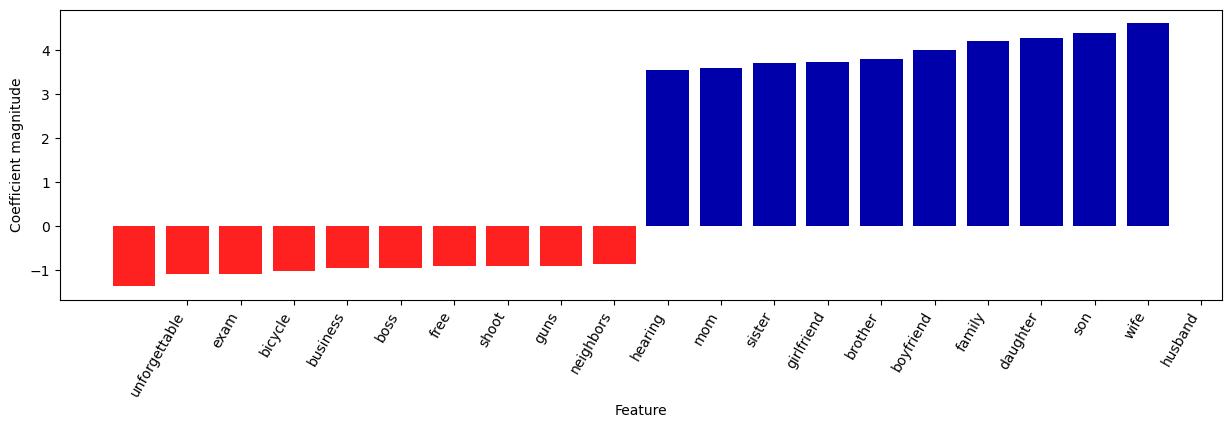

In [40]:
positive5_affection = None  # list
negative5_affection = None  # list

# BEGIN SOLUTION

affection_coeff_df = pd.DataFrame(weights[1], index=vocab, columns=["Coefficient"])
sorted_affection_coeff = affection_coeff_df.sort_values(
    by="Coefficient", ascending=False
)
positive5_affection = sorted_affection_coeff.head(5).index.tolist()
negative5_affection = sorted_affection_coeff.tail(5).index.tolist()

import mglearn

mglearn.tools.visualize_coefficients(weights[1], vocab, n_top_features=10)

# END SOLUTION

- Interpretation
    - if $w_j > 0$ then increasing $x_{ij}$ moves us toward predicting $+1$. 
    - if $w_j < 0$ then increasing $x_{ij}$ moves us toward predicting $-1$. 

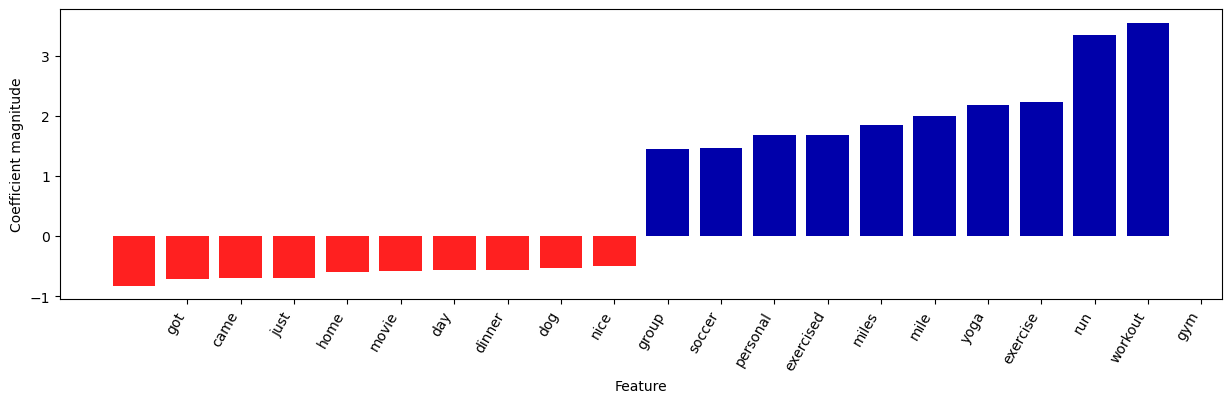

In [41]:
positive5_exercise = None  # list
negative5_exercise = None  # list

# BEGIN SOLUTION

exercise_coeff_df = pd.DataFrame(weights[4], index=vocab, columns=["Coefficient"])
sorted_exercise_coeff = exercise_coeff_df.sort_values(by="Coefficient", ascending=False)
positive5_exercise = sorted_exercise_coeff.head().index.tolist()
negative5_exercise = sorted_exercise_coeff.tail().index.tolist()

import mglearn

mglearn.tools.visualize_coefficients(weights[4], vocab, n_top_features=10)

# END SOLUTION

<!-- END QUESTION -->

<br><br>

<div class="alert alert-info">
    
### 4.2 Evaluation on test data
rubric={autograde}

Hopefully, the most informative words identified in the previous exercise made sense. Now, let's evaluate how well our best model performs on both the test set and some unseen examples.

**Your tasks:**

1. Evaluate the best model found by `random_search` from Exercise 3.3 on the entire train set and test set. Store the results in the corresponding variables below.

> Note: When `refit=True` (the default), [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) automatically retrains the best model on the full training set after finding the optimal parameters. Therefore, you can directly call `.score()` on the `random_search` object with your train and test data to get the respective scores. 

</div>

<div class="alert alert-warning">
    
Solution_4.2
    
</div>

_Points:_ 2

In [42]:
random_search_best_score = None
train_score = None
test_score = None

# BEGIN SOLUTION

random_search_best_score = random_search.best_score_
train_score = random_search.score(X_train, y_train)
test_score = random_search.score(X_test, y_test)

# END SOLUTION

print("Random Search best model score: %0.3f" % random_search_best_score)
print("Train score on the full train set: %0.3f" % train_score)
print("Test score on the full test set: %0.3f" % test_score)

Random Search best model score: 0.824
Train score on the full train set: 0.951
Test score on the full test set: 0.816


In [ ]:
grader.check("q4.2")

<br><br>

<div class="alert alert-info">
    
### 4.3 Evaluation using probability scores
rubric={autograde}

**Your tasks:**

Using this model, find the following moments in the test set 

1. where the model is most confident that the moment belongs to class "achievement" (i.e., an example with highest predicted probability for class "achievement")
2. where the model is most confident that the moment belongs to class "nature" (i.e., an example with the highest predicted probability of being "nature")

In each case, print out the moment and the associated probability score. 

</div>

<div class="alert alert-warning">
    
Solution_4.3
    
</div>

_Points:_ 4

In [45]:
# BEGIN SOLUTION
random_search.classes_
# END SOLUTION

array(['achievement', 'affection', 'bonding', 'enjoy_the_moment',
       'exercise', 'leisure', 'nature'], dtype=object)

In [46]:
achievement_prob = None  # numpy.float64
achievement_msg = None  # str

# BEGIN SOLUTION

achievement_prob = np.max(random_search.predict_proba(X_test)[:, 0])
achievement_index = np.argmax(random_search.predict_proba(X_test)[:, 0])
achievement_msg = X_test.iloc[achievement_index]

print(
    "Moment with highest probability (%0.3f) of being an achievement is:\n%s"
    % (achievement_prob, achievement_msg)
)

# END SOLUTION

Moment with highest probability (1.000) of being an achievement is:
An event that made me happy in the past 24 hours was when I was able to get a medical bill written off completely. The hospital had not followed proper procedures to get insurance approval for the treatment, which was a violation of their contract with the insurance company. Because of this the insurance company denied the claim and stated that I did not have to pay the bill. After spending 2.5 hours on the phone with the hospital and insurance company today it was concluded that the insurance company was correct and I did not have to pay the money.


In [47]:
nature_prob = None  # numpy.float64
nature_msg = None  # str

# BEGIN SOLUTION

nature_prob = np.max(random_search.predict_proba(X_test)[:, 6])
nature_index = np.argmax(random_search.predict_proba(X_test)[:, 6])
nature_msg = X_test.iloc[nature_index]

print(
    "Moment with highest probability (%0.3f) of being an nature is:\n%s"
    % (nature_prob, nature_msg)
)

# END SOLUTION

Moment with highest probability (0.994) of being an nature is:
The weather was so beautiful that I was able to go outside and plant flowers and enjoy the sun without melting. 


In [ ]:
grader.check("q4.3")

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 4.4 Fake moments 
rubric={reasoning}

**Your tasks:**

1. Test the best model on some fake moments. Some examples are given below. Feel free to add moments to this list. 
2. Briefly note your observations.

</div>

<div class="alert alert-warning">
    
Solution_4.4
    
</div>

_Points:_ 3

In [51]:
test_moments = [
    "I just finished my last assignment!",
    "On the weekend, I spent some quality time with my best friend.",
    "Collaborating with peers and teaching team members is what makes MDS enjoyable!!",
    "I went for a hike in the forest.",
    "I did yoga this morning.",
    "I am still breathing and I am alive!",
]

_Type your answer here, replacing this text._

In [52]:
# BEGIN SOLUTION
predictions = random_search.predict(test_moments)

df = pd.DataFrame(
    {"Review": test_moments, "predictions": predictions}
)  # Store in dataframe
df
# END SOLUTION

,Review,predictions
0,I just finished my last assignment!,achievement
1,"On the weekend, I spent some quality time with...",bonding
2,Collaborating with peers and teaching team mem...,bonding
3,I went for a hike in the forest.,leisure
4,I did yoga this morning.,exercise
5,I am still breathing and I am alive!,achievement


The predictions seem more or less reasonable. I guess it's an achievement to be breathing and alive but I would probably categorize "I am still breathing and I am alive!" as "enjoy_the_moment". The model seems to have predicted the most frequent "achievement" label for that moment.    

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

<div class="alert alert-info">
    
## Exercise 5: Food for thought
<hr>

Each lab will have a few challenging questions. In some labs, I will be including challenging questions which lead to the material in the upcoming week. These are usually low-risk questions and will contribute to maximum 5% of the lab grade. The main purpose here is to challenge yourself or dig deeper in a particular area. When you start working on labs, attempt all other questions before moving to these questions. If you are running out of time, please skip these questions. 

We will be more strict with the marking of these questions. There might not be model answers. If you want to get full points in these questions, your answers need to
- be thorough, thoughtful, and well-written
- provide convincing justification and appropriate evidence for the claims you make 
- impress the reader of your lab with your understanding of the material, your analytical and critical reasoning skills, and your ability to think on your own

</div>

![](img/eva-game-on.png)

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### (Challenging) Exercise 5.1
rubric={reasoning}

**Your tasks:**

- Reflect on your journey through this course. Please identify and elaborate on at least three key concepts or experiences where you had an "aha" moment. How would you use the concepts learned in this course in your personal projects or how would you approach your past projects differently based on the insights gained in this course? We encourage you to dig deep and share your genuine reflections.

</div>

<div class="alert alert-warning">
    
Solution_5.1
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### (Challenging) Exercise 5.2
rubric={reasoning}

Machine learning has its own workflows and good habits, such as when to split the data, writing your code as clear pipelines, and tuning your models in a reproducible manner, to ensure the validity of your results. In this course, we not only learned how to use a number of machine learning methods but also some good habits as a machine learning practitioner. In this exercise, I would like you to review a couple of Kaggle notebooks of your choice for some of the most popular datasets we have explored in this class and assess their methodology. 

To get you started, here are a couple of example notebooks

- [Example notebook 1](https://www.kaggle.com/code/gudisesaichand/spotify-song-attributes-eda-and-prediction/notebook)
- [Example notebook 2](https://www.kaggle.com/code/anuragnayak03/adult-income-classification-using-all-classifiers)

and some aspects you might want to examine:  

- Are they splitting the data before EDA?
- Are they carrying out cross-validation? 
- Is their code well-written, compact, and reproducible?
- Do you trust their results? Why or why not?

</div>


<div class="alert alert-warning">
    
Solution_5.2
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### (Challenging) Exercise 5.3
rubric={reasoning}

We have been saying that one of the main benefits of naive Bayes is that it's fast and scalable. 

**Your tasks:**
1. Try naive Bayes on a large dataset of your choice. Report the scores, `fit` and `score` times. Below are a couple of suggestions for the datasets.  
    - [Amazon customer reviews](https://www.kaggle.com/datasets/bhavikardeshna/amazon-customerreviews-polarity?select=train.csv)
    - [Yelp tip](https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset/versions/6?select=yelp_tip.csv)

> **For this question, please do not include the code in this notebook because we do not want this question to affect the autograder. Please create a separate Jupyter notebook in your GitHub repository and add a link to that notebook here.**

> You are welcome to explore the [`partial_fit` method supported by naive Bayes](https://scikit-learn.org/0.15/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB.partial_fit), which is useful when the whole dataset is too big to fit in memory at once.

</div>

<div class="alert alert-warning">
    
Solution_5.3
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<div class="alert alert-warning">
⚠️ Don't forget to <code>git commit</code>. Regular commits will help you track your progress!  
</div>

<br><br><br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make at least three commits to your Github repository. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.
- [ ] Include the link to your lab GitHub repository below the instructions.  


### Congratulations on finishing your last lab of the course! 👏👏👏

![](img/eva-congrats.png)